## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [358]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [646]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")

In [647]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [187]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [190]:
data.isna().any().any()

False

Количественные: duration, amount, age, number_credits.

Бинарные: telephone, foreign_worker, credit_risk.

Порядковые: 

Категориальные: status, credit history, purpose, savings, personal_status_sex, other_debtors, property, other_installment_plans, housing, job.

employment_duration, present_residence, installment_rate, people_liable - здесь можно задать отношение порядка, и признаки станут порядковыми, но пока они категориальные

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [191]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
(data[data['age'] < 30]['housing'] == 'rent').mean() * 100

66.66666666666666

In [10]:
(data[data['age'] > 40]['housing'] == 'rent').mean() * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
(data[data['foreign_worker'] == 'yes']['number_credits']).apply(lambda x: x == '4-5' or x == '>=6').sum()

1

### Задание 6 (1 балл)

In [218]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

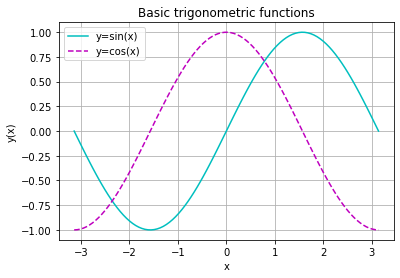

In [420]:
x = np.linspace(-pi,pi,100)
y1 = lambda x: np.sin(x)
y2 = lambda x: np.cos(x)

plt.plot(x, y1(x), 'c', label='y=sin(x)')
plt.plot(x, y2(x), 'm--', label='y=cos(x)')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Basic trigonometric functions')

plt.grid()

plt.legend()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

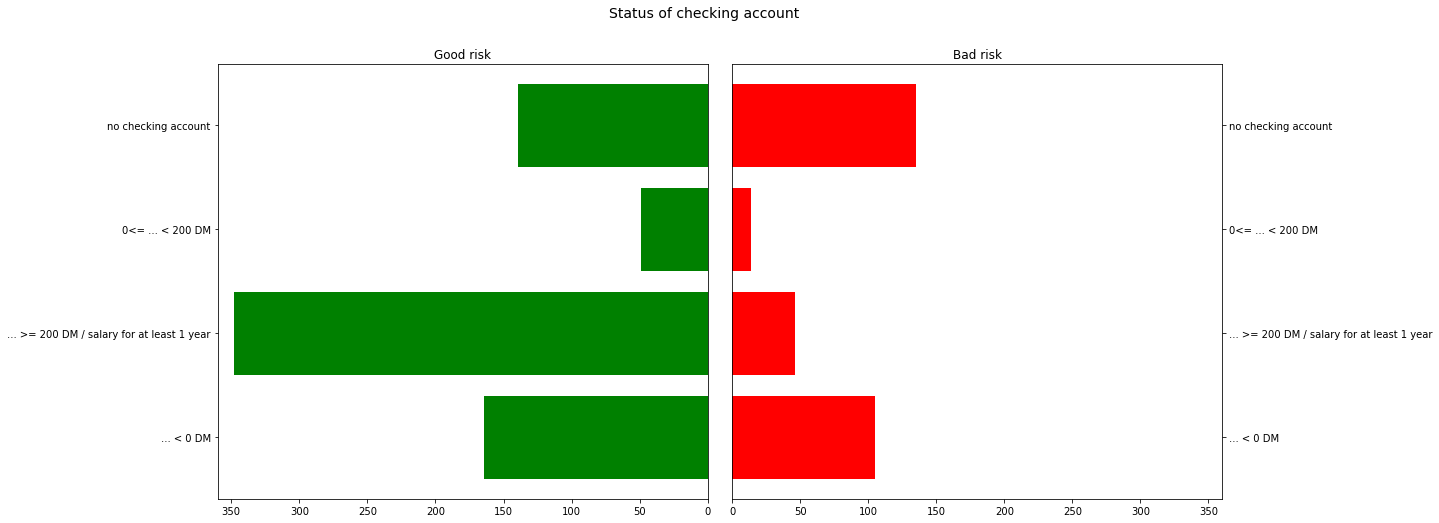

In [456]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

good = data[data['credit_risk'] == 'good']['status'].value_counts()
bad = data[data['credit_risk'] == 'bad']['status'].value_counts()
y = np.arange(len(good))
yticks = sorted(good.index.values)
x1 = good[yticks].values
x2 = bad[yticks].values

ax1.barh(y, x1, tick_label=yticks, color='green')
ax1.set_title('Good risk')

ax2.barh(y, x2, tick_label=yticks, color='red')
ax2.set_title('Bad risk')

ax1.set_xlim([360,0])
ax2.set_xlim([0,360])
ax2.yaxis.tick_right()

plt.subplots_adjust(wspace=0.05)
plt.suptitle('Status of checking account', fontsize=14)

plt.show()

### Задание 8  (0.5 балла)

In [202]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

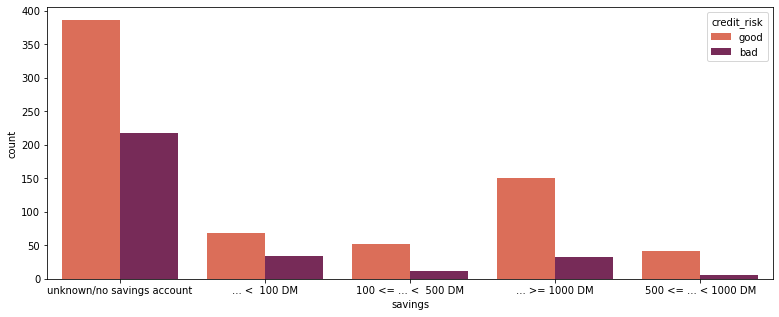

In [309]:
plt.figure(figsize=(13,5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette='rocket_r')
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

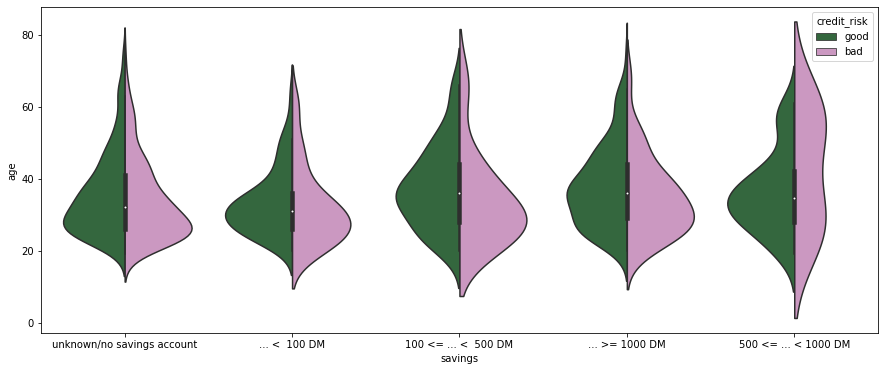

In [406]:
#plt.rcParams['figure.figsize'] = (15,6)
plt.figure(figsize=(15,6))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette='cubehelix', split=True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

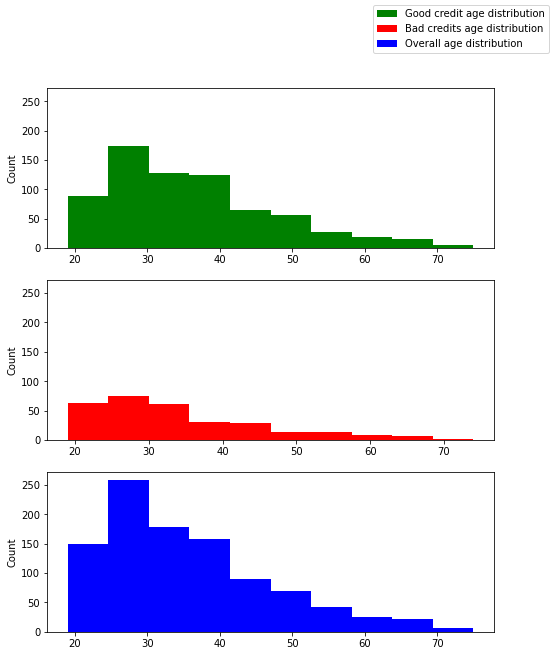

In [421]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(8,10))

good = data[data['credit_risk'] == 'good']['age'].array
ax1.hist(good, label='Good credit age distribution', color='green')
ax1.set_ylabel('Count')

bad = data[data['credit_risk'] == 'bad']['age'].array
ax2.hist(bad, label='Bad credits age distribution',color='red')
ax2.set_ylabel('Count')

overall = data['age'].array
ax3.hist(overall, label='Overall age distribution', color='blue')
ax3.set_ylabel('Count')

fig.legend()
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

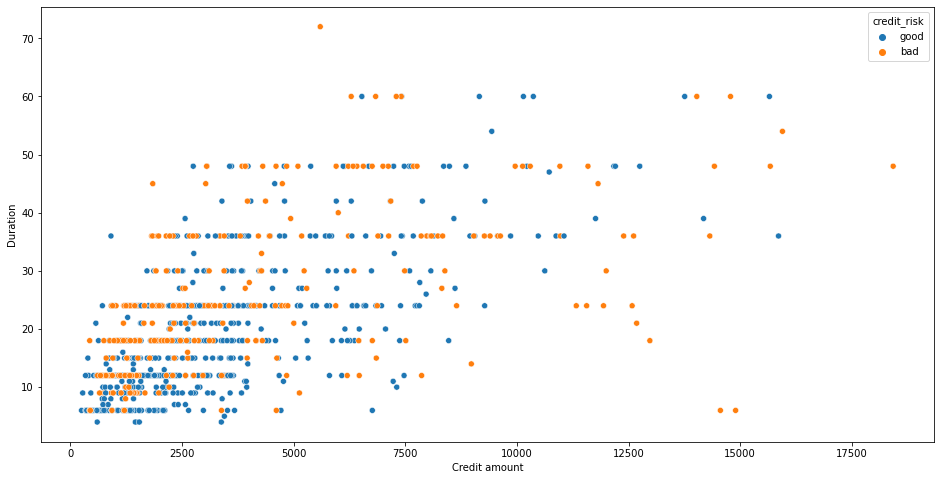

In [415]:
plt.figure(figsize=(16,8))

sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk')

plt.xlabel('Credit amount')
plt.ylabel('Duration')

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

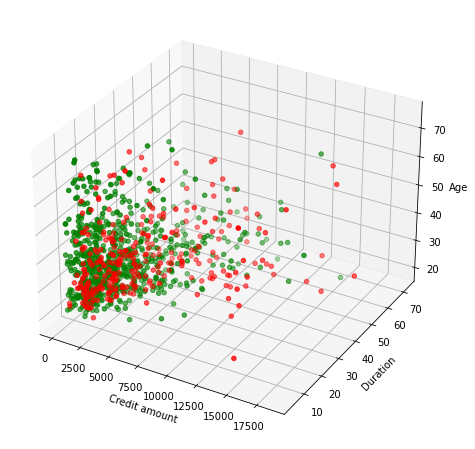

In [416]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

good = data[data['credit_risk']=='good']
x = good['amount']
y = good['duration']
z = good['age']

ax.scatter(x, y, z, color='green')

bad = data[data['credit_risk']=='bad']
x = bad['amount']
y = bad['duration']
z = bad['age']

ax.scatter(x, y, z, color='red')

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [649]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for collumn in list(data):
    if data[collumn].dtype == 'object':
        my_collumn = 'my_' + str(collumn)
        data[my_collumn] = label.fit_transform(data[collumn])

In [650]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,my_present_residence,my_property,my_other_installment_plans,my_housing,my_number_credits,my_job,my_people_liable,my_telephone,my_foreign_worker,my_credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,3,1,1,0,0,1,0,0,0,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,0,3,1,0,1,1,1,0,0,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,3,3,1,0,0,3,0,0,0,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,0,3,1,0,1,3,1,0,1,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,3,1,0,2,1,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,3,3,1,0,0,3,1,0,0,0
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,2,3,1,2,0,1,0,0,0,0
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,3,2,1,1,0,0,0,1,0,0
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,2,2,1,2,0,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [677]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Идея следующая:

In [678]:
def predict(Xtest: np.array) -> np.array:
    Xtest_len = len(Xtest)
    ans = np.full(Xtest_len, fill_value=0)
    for i in range(Xtest_len):
        #if customer's checking account status is big enough -> good
        if Xtest[i][24] in (1, 2):
            ans[i] = 1
        #if customer hasn't delay in paying off in the past -> good
        elif Xtest[i][23] != 2:
            ans[i] = 1
        #if customer is younger 60 -> good
        if Xtest[i][12] < 60:
            ans[i] = 1
        #but if customer is unemployed -> bad
        elif Xtest[i][29] in (2, 3):
            ans[i] = 0
        #if customer has co-applicant/guarantor -> good
        elif Xtest[i][31] in (0, 1):
            ans[i] = 1
    return ans
            

X = data.drop('my_credit_risk', 1).values
y = data['my_credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

0.652

Теперь составим формулу:

In [680]:
def predict(Xtest: np.array) -> np.array:
    Xtest_len = len(Xtest)
    ans = np.full(Xtest_len, fill_value=0)
    for i in range(Xtest_len):
        ans[i] = ceil((round(1/(Xtest[i][24] + 1)) + Xtest[i][23] % 2 + 1/(Xtest[i][12]) + Xtest[i][31]) / 4)
    return ans
            

X = data.drop('my_credit_risk', 1).values
y = data['my_credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

0.66